## Concrete Strength Prediction

#### Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

#### Attributes

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


Name	                               
1.	Cement (cement)	                        
2.	Blast Furnace Slag (slag)	            
3.	Fly Ash (ash)	                      
4.	Water(water)	                        
5.	Superplasticizer (superplastic)	       
6.	Coarse Aggregate (coarseagg)	       
7.	Fine Aggregate (fineagg)	           
8.	Age(age)	                         
9.	Concrete compressive strength(strength)	

Data Type
1. quantitative
2. quantitative
3. quantitative
4. quantitative
5. quantitative
6. quantitative
7. quantitative
8. quantitative
9. quantitative

Measurement
1. kg in a m3 mixture
2. kg in a m3 mixture
3. kg in a m3 mixture
4. kg in a m3 mixture
5. kg in a m3 mixture
6. kg in a m3 mixture
7. kg in a m3 mixture
8. day
9. MPa, megapascals

Description
1. Input Variable
2. Input Variable
3. Input Variable
4. Input Variable
5. Input Variable
6. Input Variable
7. Input Variable
8. Input Variable
9. Output Variable

In [19]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')
df.rename(columns={ df.columns[0]: "cement", df.columns[1]: "blast_furnace_slag", df.columns[2]: "fly_ash", df.columns[3]: "water", df.columns[4]: "superplasticizer", df.columns[5]: "coarse_aggregate", df.columns[6]: "fine_aggregate", df.columns[7]: "age", df.columns[8]: "concrete_compressive_strength" }, inplace = True)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Univariate analysis

analysis of the body of distributions/tails, outliers

In [21]:
df.shape

(1030, 9)

In [22]:
df.isnull().values.any()

False

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [24]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


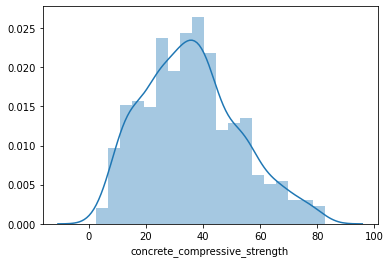

In [28]:
sns.distplot(df['concrete_compressive_strength'])
plt.show()

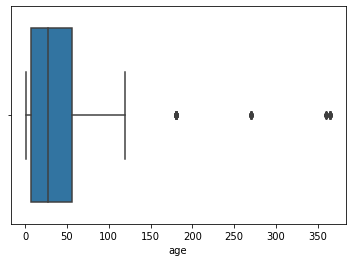

In [27]:
sns.boxplot(df['age'])
plt.show()

### Bi-variate analysis

analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves

### Feature Engineering

1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.

2. Get the data model ready and do a train test split.

3. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

## Creating the Model and Tuning It

1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)